# 果物の分類

果物の「アスペクト比」と「色相」で分類しましょう

## 可視化

データを読み込んで、どうなっているのか確認しましょう。

In [1]:
import numpy as np    
import matplotlib.pyplot as plt

np.set_printoptions(suppress = True)

In [2]:
# ランダムをコントロールできるため
import os
os.environ["CUDA_DEVICE_ORDER"]    = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '-1'
os.environ["PYTHONHASHSEED"]       = '0'

import random as rnd
from tensorflow import set_random_seed

def set_seed(seed):
    np.random.seed(seed)
    set_random_seed(seed)
    rnd.seed(seed)

まず、データセットを読み込まないといけないので、その関数を用意する：

In [3]:
# csv ファイルを開いて、データを読み込む
def load_dataset(filename, shuffle=True):
    
    # データを読み込む
    data = np.loadtxt(filename, skiprows=1, delimiter=',')
    
    # 必要であれば、シャッフル
    if shuffle:
        np.random.shuffle(data)
    
    # 入力（特徴）は２と３列目
    x = data[:,1:3]
    
    # ラベル（種類）は１列目
    y = data[:,0]
    
    return x, y

In [4]:
# 確認しましょう
x, y = load_dataset("data/fruit_01.csv", False)
print(x)

[[ 0.89030825 11.74008173]
 [ 1.17301643 34.12673816]
 [ 0.99847524 42.19727042]
 [ 1.10676546 23.4867384 ]
 [ 1.03666453 19.86156065]
 [ 1.01404891 22.75008847]
 [ 0.95334095 33.97244041]
 [ 1.09528527 32.10749056]
 [ 0.81731966 48.34061384]
 [ 1.05067534 26.33929806]
 [ 1.03751844 25.96769595]
 [ 1.05289128 34.17943407]
 [ 0.92190694 41.70713687]
 [ 1.17252989 40.17188352]
 [ 0.92207999 41.80061767]
 [ 1.05865131 21.42652237]
 [ 0.94337251 25.60227385]
 [ 0.92636081 26.87083629]
 [ 0.97811395 23.66416783]
 [ 0.95020499 30.21482662]
 [ 1.09465861 34.2980831 ]
 [ 0.96837834 26.11624128]
 [ 1.10295387 31.15025173]
 [ 1.06030747 22.89983874]
 [ 1.05098782 32.35832526]
 [ 0.95680928 27.11360015]
 [ 1.01660954 34.39878269]
 [ 1.1631944  27.248324  ]
 [ 0.94449406 26.49224201]
 [ 0.79986818 32.67676612]
 [ 1.00387796 28.21471988]
 [ 1.07101768 25.57511615]
 [ 1.05912559 32.13878295]
 [ 1.05399443 28.36627435]
 [ 0.94132739 30.82543685]
 [ 0.96246899 23.43663723]
 [ 0.97812062 26.78127265]
 

In [5]:
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


わけわらない…

## 可視化

分かりやすくしよう。点群データとして表現しましょう

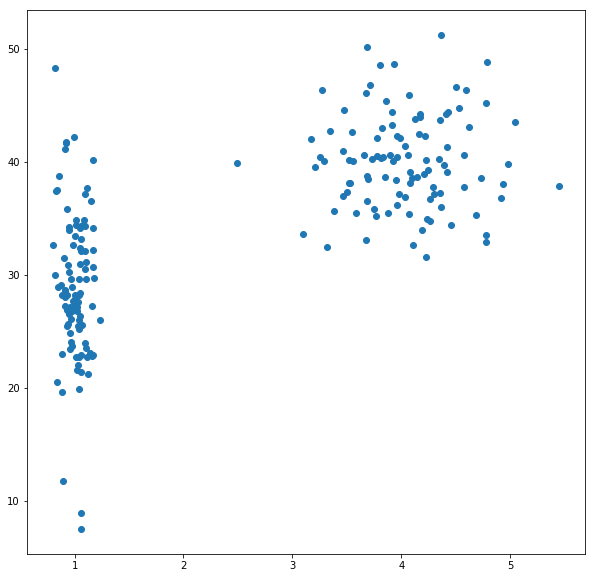

In [6]:
def plot_fruits(x):
    # アスペクト比と色相を別々にして
    aspect = x[:,0]
    colors = x[:,1]
    
    # アスペクト比 vs 色相で描画
    plt.figure(figsize=(10,10))
    plt.scatter(aspect, colors)
    
plot_fruits(x)

折角なので、色も表現しましょう！

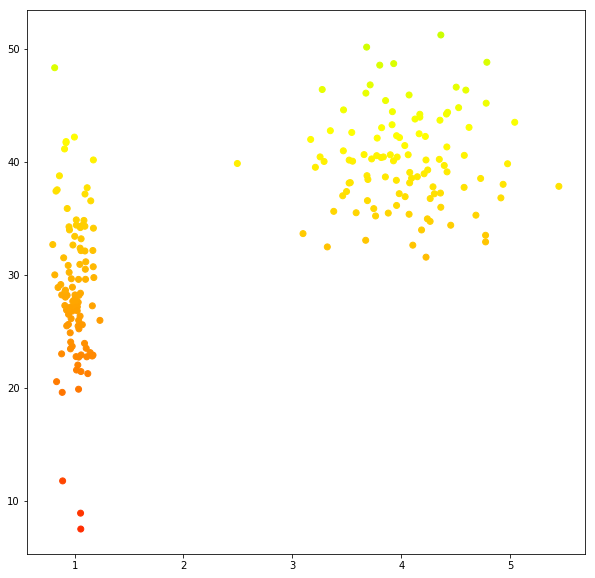

In [7]:
from matplotlib.colors import hsv_to_rgb

def plot_fruits(x):
    # アスペクト比と色相を別々にして
    aspect = x[:,0]
    colors = x[:,1]
    
    #色相(h)をRGBに変換しましょう
    hsv = np.ones((colors.shape[0], 3))
    hsv[:,0] = colors / 255
    rgb = hsv_to_rgb(hsv)
    
    # アスペクト比 vs 色相で描画
    plt.figure(figsize=(10,10))
    plt.scatter(aspect, colors, c=rgb)
    
plot_fruits(x)

## データの準備：正規化＆One-Hotエンコーディング

In [8]:
# KerasはOne-Hotエンコーディングの機能がついている！
from keras.utils import to_categorical

# それでは、データを準備しよう
def prepare_dataset(x, y):
    aspect = x[:,0]
    color = x[:,1]
    
    # 最大値でありそうな数値にして、それに割る
    aspect = aspect / 10
    color  = color / 255
    
    # 数値を上書きする
    x[:,0] = aspect
    x[:,1] = color
    
    # one hot encoding
    y = to_categorical(y)

    # 準備完了
    return x, y

Using TensorFlow backend.


In [9]:
# 確認しましょう
px, py = prepare_dataset(x, y)
print(px)

[[0.08903082 0.04603954]
 [0.11730164 0.13383035]
 [0.09984752 0.16547949]
 [0.11067655 0.09210486]
 [0.10366645 0.07788847]
 [0.10140489 0.08921603]
 [0.0953341  0.13322526]
 [0.10952853 0.12591173]
 [0.08173197 0.18957103]
 [0.10506753 0.10329136]
 [0.10375184 0.1018341 ]
 [0.10528913 0.134037  ]
 [0.09219069 0.1635574 ]
 [0.11725299 0.1575368 ]
 [0.092208   0.16392399]
 [0.10586513 0.08402558]
 [0.09433725 0.10040107]
 [0.09263608 0.10537583]
 [0.09781139 0.09280066]
 [0.0950205  0.11848952]
 [0.10946586 0.13450229]
 [0.09683783 0.10241663]
 [0.11029539 0.12215785]
 [0.10603075 0.08980329]
 [0.10509878 0.12689539]
 [0.09568093 0.10632784]
 [0.10166095 0.13489719]
 [0.11631944 0.10685617]
 [0.09444941 0.10389115]
 [0.07998682 0.12814418]
 [0.1003878  0.11064596]
 [0.10710177 0.10029457]
 [0.10591256 0.12603444]
 [0.10539944 0.11124029]
 [0.09413274 0.12088407]
 [0.0962469  0.09190838]
 [0.09781206 0.1050246 ]
 [0.10483409 0.1212522 ]
 [0.0932489  0.14066569]
 [0.1142964  0.09061339]


In [10]:
print(py)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

## モデル作成

データの準備ができたので、モデルを作成しよう。

ただ、中間層何個が必要か？ニューロンの数は？を答えるのはAIエンジニアの仕事になる。

今回は適当に作成してみて、必要であれば、モデルを更新しましょう。

In [11]:
from keras.layers import Input, Dense
from keras.models import Model

# 一番単純なネットワーク
# 入力２つ、出力２つ
def create_model():
    
    x = Input(shape=(2,), dtype=float)
    
    # softmaxは出力の正規化する。
    # これで、信頼の数値は必ず 0～1になる
    y = Dense(2, activation="softmax")(x)
    
    model = Model(inputs=x, outputs=y)

    return model

In [12]:
set_seed(34567)

model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## 損失関数

* 距離なら、`mean_squared_value`
* バイナリ出力は、`binary_crossentropy`
* 分類の場合は、`categorical_crossentropy`

を使いましょう

In [13]:
model.compile(optimizer="sgd", loss="categorical_crossentropy")

In [14]:
model.fit(px, py, epochs=500)

Epoch 1/500
205/205 [==============================] - 0s 1ms/step - loss: 0.6679
Epoch 2/500
205/205 [==============================] - 0s 34us/step - loss: 0.6670
Epoch 3/500
205/205 [==============================] - 0s 24us/step - loss: 0.6661
Epoch 4/500
205/205 [==============================] - 0s 29us/step - loss: 0.6653
Epoch 5/500
205/205 [==============================] - 0s 34us/step - loss: 0.6644
Epoch 6/500
205/205 [==============================] - 0s 29us/step - loss: 0.6636
Epoch 7/500
205/205 [==============================] - 0s 34us/step - loss: 0.6629
Epoch 8/500
205/205 [==============================] - 0s 34us/step - loss: 0.6619
Epoch 9/500
205/205 [==============================] - 0s 29us/step - loss: 0.6612
Epoch 10/500
205/205 [==============================] - 0s 29us/step - loss: 0.6603
Epoch 11/500
205/205 [==============================] - 0s 39us/step - loss: 0.6596
Epoch 12/500
205/205 [==============================] - 0s 49us/step - loss: 0.6587
Ep

205/205 [==============================] - 0s 29us/step - loss: 0.6010
Epoch 99/500
205/205 [==============================] - 0s 24us/step - loss: 0.6004
Epoch 100/500
205/205 [==============================] - 0s 24us/step - loss: 0.5998
Epoch 101/500
205/205 [==============================] - 0s 34us/step - loss: 0.5992
Epoch 102/500
205/205 [==============================] - 0s 24us/step - loss: 0.5985
Epoch 103/500
205/205 [==============================] - 0s 24us/step - loss: 0.5980
Epoch 104/500
205/205 [==============================] - 0s 29us/step - loss: 0.5973
Epoch 105/500
205/205 [==============================] - 0s 24us/step - loss: 0.5967
Epoch 106/500
205/205 [==============================] - 0s 29us/step - loss: 0.5962
Epoch 107/500
205/205 [==============================] - 0s 29us/step - loss: 0.5955
Epoch 108/500
205/205 [==============================] - 0s 24us/step - loss: 0.5949
Epoch 109/500
205/205 [==============================] - 0s 29us/step - loss: 0.

205/205 [==============================] - 0s 29us/step - loss: 0.5464
Epoch 195/500
205/205 [==============================] - 0s 29us/step - loss: 0.5458
Epoch 196/500
205/205 [==============================] - 0s 29us/step - loss: 0.5452
Epoch 197/500
205/205 [==============================] - 0s 34us/step - loss: 0.5447
Epoch 198/500
205/205 [==============================] - 0s 29us/step - loss: 0.5442
Epoch 199/500
205/205 [==============================] - 0s 24us/step - loss: 0.5437
Epoch 200/500
205/205 [==============================] - 0s 24us/step - loss: 0.5431
Epoch 201/500
205/205 [==============================] - 0s 29us/step - loss: 0.5426
Epoch 202/500
205/205 [==============================] - 0s 24us/step - loss: 0.5420
Epoch 203/500
205/205 [==============================] - 0s 29us/step - loss: 0.5416
Epoch 204/500
205/205 [==============================] - 0s 29us/step - loss: 0.5411
Epoch 205/500
205/205 [==============================] - 0s 29us/step - loss: 0

205/205 [==============================] - 0s 24us/step - loss: 0.4991
Epoch 291/500
205/205 [==============================] - 0s 34us/step - loss: 0.4986
Epoch 292/500
205/205 [==============================] - 0s 24us/step - loss: 0.4982
Epoch 293/500
205/205 [==============================] - 0s 24us/step - loss: 0.4977
Epoch 294/500
205/205 [==============================] - 0s 34us/step - loss: 0.4973
Epoch 295/500
205/205 [==============================] - 0s 29us/step - loss: 0.4968
Epoch 296/500
205/205 [==============================] - 0s 34us/step - loss: 0.4964
Epoch 297/500
205/205 [==============================] - 0s 29us/step - loss: 0.4959
Epoch 298/500
205/205 [==============================] - 0s 29us/step - loss: 0.4954
Epoch 299/500
205/205 [==============================] - 0s 24us/step - loss: 0.4950
Epoch 300/500
205/205 [==============================] - 0s 24us/step - loss: 0.4945
Epoch 301/500
205/205 [==============================] - 0s 29us/step - loss: 0

205/205 [==============================] - 0s 24us/step - loss: 0.4582
Epoch 387/500
205/205 [==============================] - 0s 24us/step - loss: 0.4578
Epoch 388/500
205/205 [==============================] - 0s 24us/step - loss: 0.4574
Epoch 389/500
205/205 [==============================] - 0s 29us/step - loss: 0.4571
Epoch 390/500
205/205 [==============================] - 0s 29us/step - loss: 0.4567
Epoch 391/500
205/205 [==============================] - 0s 29us/step - loss: 0.4562
Epoch 392/500
205/205 [==============================] - 0s 24us/step - loss: 0.4559
Epoch 393/500
205/205 [==============================] - 0s 34us/step - loss: 0.4555
Epoch 394/500
205/205 [==============================] - 0s 29us/step - loss: 0.4551
Epoch 395/500
205/205 [==============================] - 0s 24us/step - loss: 0.4547
Epoch 396/500
205/205 [==============================] - 0s 29us/step - loss: 0.4544
Epoch 397/500
205/205 [==============================] - ETA: 0s - loss: 0.461 

205/205 [==============================] - 0s 29us/step - loss: 0.4227
Epoch 483/500
205/205 [==============================] - 0s 24us/step - loss: 0.4224
Epoch 484/500
205/205 [==============================] - 0s 29us/step - loss: 0.4220
Epoch 485/500
205/205 [==============================] - 0s 29us/step - loss: 0.4217
Epoch 486/500
205/205 [==============================] - 0s 34us/step - loss: 0.4214
Epoch 487/500
205/205 [==============================] - 0s 29us/step - loss: 0.4210
Epoch 488/500
205/205 [==============================] - 0s 34us/step - loss: 0.4207
Epoch 489/500
205/205 [==============================] - 0s 24us/step - loss: 0.4204
Epoch 490/500
205/205 [==============================] - 0s 29us/step - loss: 0.4200
Epoch 491/500
205/205 [==============================] - 0s 24us/step - loss: 0.4197
Epoch 492/500
205/205 [==============================] - 0s 34us/step - loss: 0.4193
Epoch 493/500
205/205 [==============================] - 0s 29us/step - loss: 0

## 検証データについて

普段、学習の結果を確かめるため、一部のデータを学習データから取り除いて、学習する。

一部取り除いたデータは「検証データ」として、ネットワークが見たことないデータでもちゃんと分類できるかどうかを確認するためのデータ

In [15]:
# 検証データを読み込んで、中身を確認しよう
tx, ty = load_dataset("data/fruit_test.csv", shuffle=False)
print (tx)

[[ 1.04812375 29.88844912]
 [ 0.99056145 29.01464018]
 [ 0.96620155 39.11174428]
 [ 1.07115287 29.78067192]
 [ 2.87112654 50.81212729]
 [ 4.81450471 45.05309173]
 [ 3.29056587 50.10722055]
 [ 3.81800288 41.22132398]
 [ 1.10698633 31.71801177]
 [ 1.21641904 27.744747  ]
 [ 1.25720482 36.73746784]
 [ 1.50473198 23.36346739]
 [ 1.16025304 47.20023849]
 [ 1.5314913  49.65788335]
 [ 0.9958382  52.2819808 ]
 [ 1.2935199  56.061364  ]]


In [16]:
print(ty)

[0. 0. 0. 0. 1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3.]


In [17]:
# 今回は0:オリジンと１：バナナしか学習させていないので
# 必要な部分だけ残す
tx = tx[0:8,:]
ty = ty[0:8]
print(tx)
print(ty)

[[ 1.04812375 29.88844912]
 [ 0.99056145 29.01464018]
 [ 0.96620155 39.11174428]
 [ 1.07115287 29.78067192]
 [ 2.87112654 50.81212729]
 [ 4.81450471 45.05309173]
 [ 3.29056587 50.10722055]
 [ 3.81800288 41.22132398]]
[0. 0. 0. 0. 1. 1. 1. 1.]


In [18]:
#データを準備して、確認しましょう～
tx, ty = prepare_dataset(tx, ty)

In [19]:
y_pred = model.predict(tx)
print(y_pred)

[[0.6354399  0.36456013]
 [0.64246726 0.3575327 ]
 [0.6271915  0.3728085 ]
 [0.63341177 0.3665882 ]
 [0.4113643  0.5886357 ]
 [0.24575785 0.7542421 ]
 [0.37120157 0.62879837]
 [0.33647788 0.6635221 ]]


In [20]:
# 読みやすい関数を作ろう
def print_result(y):
    
    # 数値のラベルをテキストにする
    text_label = [
        'オレンジ', 
        'バナナ　']
    
    # 最大値はどれ？
    confidence = y * 100
    
    # 読みやすい出力にする
    for item in confidence:
        max_val = np.argmax(item)
        print('%s (%.2f%%)'%(text_label[max_val], item[max_val]))

print_result(y_pred)

オレンジ (63.54%)
オレンジ (64.25%)
オレンジ (62.72%)
オレンジ (63.34%)
バナナ　 (58.86%)
バナナ　 (75.42%)
バナナ　 (62.88%)
バナナ　 (66.35%)


## モデルの改善

結果が何となく出たが、信頼が低いなので、中間層を追加して、改善しましょう

In [21]:
def create_model():
    
    x = Input(shape=(2,), dtype=float)
    h = Dense(16, activation="relu")(x)
    y = Dense(2, activation="softmax")(h)
    
    model = Model(inputs=x, outputs=y)

    return model

In [22]:
set_seed(34567)

model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer="sgd", loss="categorical_crossentropy")

In [24]:
model.fit(px, py, epochs=500)

Epoch 1/500
205/205 [==============================] - 0s 526us/step - loss: 0.7133
Epoch 2/500
205/205 [==============================] - 0s 39us/step - loss: 0.7088
Epoch 3/500
205/205 [==============================] - 0s 29us/step - loss: 0.7032
Epoch 4/500
205/205 [==============================] - 0s 29us/step - loss: 0.6972
Epoch 5/500
205/205 [==============================] - 0s 29us/step - loss: 0.6907
Epoch 6/500
205/205 [==============================] - 0s 29us/step - loss: 0.6845
Epoch 7/500
205/205 [==============================] - 0s 34us/step - loss: 0.6782
Epoch 8/500
205/205 [==============================] - 0s 34us/step - loss: 0.6721
Epoch 9/500
205/205 [==============================] - 0s 34us/step - loss: 0.6667
Epoch 10/500
205/205 [==============================] - 0s 34us/step - loss: 0.6620
Epoch 11/500
205/205 [==============================] - 0s 34us/step - loss: 0.6583
Epoch 12/500
205/205 [==============================] - 0s 34us/step - loss: 0.6551


205/205 [==============================] - 0s 29us/step - loss: 0.4950
Epoch 99/500
205/205 [==============================] - 0s 34us/step - loss: 0.4928
Epoch 100/500
205/205 [==============================] - 0s 24us/step - loss: 0.4908
Epoch 101/500
205/205 [==============================] - 0s 29us/step - loss: 0.4886
Epoch 102/500
205/205 [==============================] - 0s 34us/step - loss: 0.4864
Epoch 103/500
205/205 [==============================] - 0s 29us/step - loss: 0.4843
Epoch 104/500
205/205 [==============================] - 0s 29us/step - loss: 0.4823
Epoch 105/500
205/205 [==============================] - 0s 24us/step - loss: 0.4800
Epoch 106/500
205/205 [==============================] - 0s 39us/step - loss: 0.4779
Epoch 107/500
205/205 [==============================] - 0s 24us/step - loss: 0.4757
Epoch 108/500
205/205 [==============================] - 0s 29us/step - loss: 0.4736
Epoch 109/500
205/205 [==============================] - 0s 29us/step - loss: 0.

205/205 [==============================] - 0s 39us/step - loss: 0.2908
Epoch 195/500
205/205 [==============================] - 0s 24us/step - loss: 0.2890
Epoch 196/500
205/205 [==============================] - 0s 24us/step - loss: 0.2870
Epoch 197/500
205/205 [==============================] - 0s 29us/step - loss: 0.2852
Epoch 198/500
205/205 [==============================] - 0s 24us/step - loss: 0.2833
Epoch 199/500
205/205 [==============================] - 0s 29us/step - loss: 0.2816
Epoch 200/500
205/205 [==============================] - 0s 29us/step - loss: 0.2798
Epoch 201/500
205/205 [==============================] - 0s 34us/step - loss: 0.2779
Epoch 202/500
205/205 [==============================] - 0s 29us/step - loss: 0.2762
Epoch 203/500
205/205 [==============================] - 0s 24us/step - loss: 0.2744
Epoch 204/500
205/205 [==============================] - 0s 34us/step - loss: 0.2726
Epoch 205/500
205/205 [==============================] - 0s 24us/step - loss: 0

205/205 [==============================] - 0s 29us/step - loss: 0.1578
Epoch 291/500
205/205 [==============================] - 0s 24us/step - loss: 0.1568
Epoch 292/500
205/205 [==============================] - 0s 29us/step - loss: 0.1560
Epoch 293/500
205/205 [==============================] - 0s 24us/step - loss: 0.1549
Epoch 294/500
205/205 [==============================] - 0s 24us/step - loss: 0.1541
Epoch 295/500
205/205 [==============================] - 0s 24us/step - loss: 0.1532
Epoch 296/500
205/205 [==============================] - 0s 29us/step - loss: 0.1523
Epoch 297/500
205/205 [==============================] - 0s 29us/step - loss: 0.1514
Epoch 298/500
205/205 [==============================] - 0s 29us/step - loss: 0.1505
Epoch 299/500
205/205 [==============================] - 0s 24us/step - loss: 0.1496
Epoch 300/500
205/205 [==============================] - 0s 29us/step - loss: 0.1488
Epoch 301/500
205/205 [==============================] - 0s 24us/step - loss: 0

205/205 [==============================] - 0s 29us/step - loss: 0.0947
Epoch 387/500
205/205 [==============================] - 0s 24us/step - loss: 0.0942
Epoch 388/500
205/205 [==============================] - 0s 29us/step - loss: 0.0938
Epoch 389/500
205/205 [==============================] - 0s 24us/step - loss: 0.0934
Epoch 390/500
205/205 [==============================] - 0s 24us/step - loss: 0.0929
Epoch 391/500
205/205 [==============================] - 0s 24us/step - loss: 0.0925
Epoch 392/500
205/205 [==============================] - 0s 24us/step - loss: 0.0921
Epoch 393/500
205/205 [==============================] - 0s 34us/step - loss: 0.0916
Epoch 394/500
205/205 [==============================] - 0s 29us/step - loss: 0.0913
Epoch 395/500
205/205 [==============================] - 0s 34us/step - loss: 0.0908
Epoch 396/500
205/205 [==============================] - ETA: 0s - loss: 0.093 - 0s 24us/step - loss: 0.0904
Epoch 397/500
205/205 [==============================] 

205/205 [==============================] - 0s 29us/step - loss: 0.0637
Epoch 483/500
205/205 [==============================] - 0s 24us/step - loss: 0.0635
Epoch 484/500
205/205 [==============================] - 0s 29us/step - loss: 0.0632
Epoch 485/500
205/205 [==============================] - 0s 29us/step - loss: 0.0630
Epoch 486/500
205/205 [==============================] - 0s 24us/step - loss: 0.0628
Epoch 487/500
205/205 [==============================] - 0s 34us/step - loss: 0.0626
Epoch 488/500
205/205 [==============================] - 0s 34us/step - loss: 0.0623
Epoch 489/500
205/205 [==============================] - 0s 29us/step - loss: 0.0621
Epoch 490/500
205/205 [==============================] - 0s 29us/step - loss: 0.0619
Epoch 491/500
205/205 [==============================] - 0s 24us/step - loss: 0.0617
Epoch 492/500
205/205 [==============================] - 0s 29us/step - loss: 0.0614
Epoch 493/500
205/205 [==============================] - 0s 29us/step - loss: 0

In [25]:
y_pred = model.predict(tx)
print(y_pred)
print_result(y_pred)

[[0.93531245 0.06468756]
 [0.9422605  0.05773953]
 [0.93962705 0.06037289]
 [0.9325918  0.06740819]
 [0.25010377 0.7498962 ]
 [0.00818623 0.9918138 ]
 [0.12860794 0.8713921 ]
 [0.05400634 0.94599366]]
オレンジ (93.53%)
オレンジ (94.23%)
オレンジ (93.96%)
オレンジ (93.26%)
バナナ　 (74.99%)
バナナ　 (99.18%)
バナナ　 (87.14%)
バナナ　 (94.60%)


## 練習：種類を増やす

fruits_02.csvでレモン（2）とみかん（3）を追加し、もう一度学習させてみて～